In [15]:
%%html
<style>
.output_png {
    text-align:center;
    display:table-cell;
    vertical-align:middle;
}
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
    color: black !important;
    margin-left: auto;
    margin-right: auto;
}
div.output_area .rendered_html table{
    margin-left: auto;
    margin-right: auto;
}
</style>

In [2]:
# Imports
import ipywidgets as widgets
from IPython.display import Javascript, display
import os
import matplotlib.pyplot as plt
import cv2
import aganitha_hocr
from aganitha_hocr import controller
import pandas as pd
from IPython.display import display
from IPython.display import Image
from IPython.display import clear_output
from ipywidgets import Button, HBox, VBox
from IPython.display import clear_output, FileLink, FileLinks


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3u923ht8 because the default path (/home/jupyter/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
DEBUG:shapely.geos:Found GEOS DLL: <CDLL '/opt/miniconda/lib/python3.7/site-packages/shapely/.libs/libgeos_c-a68605fd.so.1.13.1', handle 55af5f01f600 at 0x7f35b0c82dd0>, using it.
DEBUG:shapely.geos:Trying `CDLL(libc.so.6)`
DEBUG:shapely.geos:Library path: 'libc.so.6'
DEBUG:shapely.geos:DLL: <CDLL 'libc.so.6', handle 7f3638e234f0 at 0x7f35d67d4250>


## Introduction
---


This demo takes in files like remittance advices, cash cheques and envelopes and extracts transactions from remittance advices. Finally the data is dumped into disk or pushed into a database.

## Process Workflow
---

<div style="text-align:center"><img src="./AR-Automation-process-flow.png" alt="WorkFlow"></div>
<div style="text-align:center"><em>AR-Automation-process-flow</em></div>

In [3]:
import os, fnmatch
def find(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))
    

In [4]:
# def run_k(ev):
#     print('Do Something!')
# state = ['Single File', 'Batched Input']
# items = [widgets.Button(description=w,disabled=False,
#     button_style='primary') for w in state]
# items[0].on_click(run_k)
# items[1].on_click(run_k)
# HBox([items[0], items[1]])

## Pick a Date
---
Pick a date to showcase all remittance advices for a given date.

In [5]:
date_dict = dict()
data_dir = '/home/jupyter/data/demo_date_wise/'
date_folders = os.listdir('/home/jupyter/data/demo_date_wise/')
for folder_name in date_folders:
    list_of_images = os.listdir(os.path.join(data_dir,folder_name))
    list_of_images = [image for image in list_of_images if image.endswith(".jpg")]
    key_dict = folder_name + ' | ' + ' Number of remittance advices--->' +str(len(list_of_images)) 
    date_dict[key_dict] = folder_name
default_date = list(date_dict.keys())[0]
# date_folders = os.listdir("/home/jupyter/data/demo_date_wise/")
w = widgets.Dropdown(
    options=date_dict,
    description='Date Selector:',
    disabled=False,
    layout=widgets.Layout(align_items='center',width='400px'),
    style={'description_width':'initial'},
    value=date_dict[default_date]
)
def on_change(change):
    with out:
        out.clear_output()
        filepath = '/home/jupyter/data/demo_date_wise/' + change.new
        filenames = os.listdir('/home/jupyter/data/demo_date_wise/' + change.new)
        images = os.listdir("/home/jupyter/data/demo_date_wise/" + change.new)
        images = [image for image in images if image.endswith(".jpg")]

w.observe(on_change, names='value')
display(w)
out = widgets.Output()
display(out)

Dropdown(description='Date Selector:', layout=Layout(align_items='center', width='400px'), options={'07.06.20 …

Output()

Update the image list and use the dropdown menu below to select a image in the given folder.

In [6]:
button = widgets.Button(description="Update image list",
    disabled=False,
    button_style='primary',
    tooltip='Submit',
    )
button.on_click(run_all)
display(button)

Button(button_style='primary', description='Update image list', style=ButtonStyle(), tooltip='Submit')

In [1]:
date_value = w.value
date_files = os.listdir("/home/jupyter/data/demo_date_wise/" + date_value)
date_files = [date_file for date_file in date_files if date_file.endswith(".jpg")]

default_image = date_files[0]

dropdown_image_names = widgets.Dropdown(
    options=date_files,
    description='Select An Image To View:',
    disabled=False,
    layout=widgets.Layout(align_items='center',width='450px'),
    style={'description_width':'initial'},
    value=default_image
)


def on_change_image(change):
    if change['type']=='change' and change['name']=='value':
        output.clear_output()
        with output:
            path = "/home/jupyter/data/demo_date_wise/" + date_value + '/'
            #display(Image(filename=path+change.new))
            img = cv2.imread(path+change.new, 0)
            plt.figure(figsize=(11,11))
            plt.imshow(img, cmap= 'gray')
            plt.xticks([])
            plt.yticks([])
            plt.show()

dropdown_image_names.observe(on_change_image, names='value')
display(dropdown_image_names)

output = widgets.Output()
display(output)
with output:
    # display(Image(filename="/home/jupyter/data/demo_date_wise/" + date_value + '/' + default_image,width=1000, unconfined=False))
    img = cv2.imread("/home/jupyter/data/demo_date_wise/" + date_value + '/' + default_image, 0)
    plt.figure(figsize=(11,11))
    plt.imshow(img, cmap= 'gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

NameError: name 'w' is not defined

## Process Pipeline
---

The pipeline takes in remittance advice as input, performs OCR and extracts transactional data from input. The extracted data can be downloaded in form of spreadsheet.

In [8]:
button_out = widgets.Button(description='Run model',
    disabled=False,
    button_style='primary',
    tooltip='Submit',
    icon='fa-cogs')
button_out.on_click(run_all)
display(button_out)

Button(button_style='primary', description='Run model', icon='cogs', style=ButtonStyle(), tooltip='Submit')

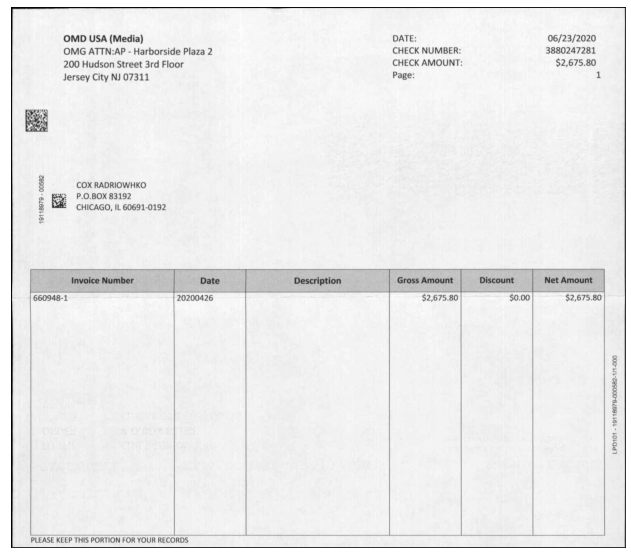

,Date,Check Number,Check Amount,Invoice Number,Invoice Date,Gross Amount,Net Amount
0,06/23/2020,3880247281,2675.8,660948-1,20200426,2675.8,2675.8


/home/jupyter/notebooks/src/hocr/notebooks/Remittance_Advice.csv

In [26]:
from IPython.display import HTML
image_name = dropdown_image_names.value
path = "/home/jupyter/data/demo_date_wise/" + date_value + '/' + image_name + '.hocr.hocrjs.html'
file, extracted_params, temp = controller.main(filepath=path)
store_path = '/home/jupyter/data/demo_date_wise_output/' + date_value
controller.extract_data(file,temp,extracted_params,store_path)
csv_data = find('{}*.csv'.format(image_name), store_path)
df = pd.read_csv(csv_data[0])
image_path = "/home/jupyter/data/demo_date_wise/" + date_value + '/' + image_name
# html1 = '<img src='+image_path+' width="240" height="240" align="center"/>'
# display(HTML(html1))
img = cv2.imread(image_path, 0)
plt.figure(figsize=(11,11))
plt.imshow(img, cmap= 'gray')
plt.xticks([])
plt.yticks([])
plt.show()
#display(Image(filename="/home/jupyter/data/demo_date_wise/" + date_value + '/' + image_name, height=400, width=600))
display(df.head(10))
df.to_csv("Remittance_Advice" + '.csv', index=False)


## Download remittance advice

In [1]:
display(FileLink("Remittance_Advice" + '.csv', result_html_prefix="Click here to download: "))

NameError: name 'FileLink' is not defined

In [10]:
# image_path = "" + date_value + '/' + image_name
# html1 = '<img src="./AR-Automation-process-flow.png" width="240" height="240" align="center"/>'
# display(HTML(html1))

In [11]:
# date_folders = os.listdir("/home/jupyter/data/demo_date_wise/")
# dd_date = widgets.Dropdown(
#     options=date_folders,
#     description='Select Date:',
#     disabled=False,
#     layout=widgets.Layout(align_items='center',width='350px'),
#     style={'description_width':'initial'}
# )

# def on_change_of_date(change):
#     with output_2:
#         clear_output()
#         filepath = '/home/jupyter/data/demo_date_wise/' + change.new
#         filenames = os.listdir('/home/jupyter/data/demo_date_wise/' + change.new)
#         for filename in filenames:
#             if filename.endswith(".html"):
#                 #print(os.path.join(filepath,filename))
#                 # controller.main(filepath=os.path.join(filepath,filename))
#                 file, extracted_params, temp = controller.main(filepath=os.path.join(filepath,filename))
#                 store_path = '/home/jupyter/data/demo_date_wise_output/' + change.new
#                 controller.extract_data(file,temp,extracted_params,store_path)
#         csv_data = find("*.csv", '/home/jupyter/data/demo_date_wise_output/' + change.new)
#         for csv in csv_data:
#             df = pd.read_csv(csv)
#             display(df.head(10))
# dd_date.observe(on_change_of_date, names='value')
# display(dd_date)
# output_2 = widgets.Output()
# display(output_2)


In [12]:
## Download Merged  Spreadsheet

In [13]:
# merge_path = '/home/jupyter/data/demo_date_wise_output/'

# date_folders = os.listdir("/home/jupyter/data/demo_date_wise_output/")
# merge = widgets.Dropdown(
#     options=date_folders,
#     description='Merge by date Selector:',
#     disabled=False,
#     layout={'width': 'max-content'},
#     style={'description_width':'initial'}
# )
# def merge_csv(cust, csv_path, csv_list):
#     cust_csv = cust+".csv"
#     #csv_list.remove(cust+".csv")
#     #csv_list.remove(cust_csv)
#     combined_csv = pd.concat([pd.read_csv(os.path.join(csv_path,csv)) for csv in csv_list if csv.endswith(".csv")], ignore_index=True)
#     print("Combined --> Start")
#     combined_csv.to_csv('./' + cust + '.csv', index=False)
#     display(combined_csv)
#     display(FileLink('./' + cust + '.csv', result_html_prefix="Click here to download: "))
#     print("Combined --> End")

# def on_change(change):
#     with output_3:
#         clear_output()
#         filepath = '/home/jupyter/data/demo_date_wise_output/' + change.new + '/csv/'
#         cust_name = os.listdir('/home/jupyter/data/demo_date_wise_output/' + change.new + '/csv/')
#         for cust in cust_name:
#             csv_path = '/home/jupyter/data/demo_date_wise_output/' + change.new + '/csv/' + cust
#             csv_list = os.listdir('/home/jupyter/data/demo_date_wise_output/' + change.new + '/csv/' + cust)
#             if len(csv_list) > 1:
#                 print(cust)
#                 merge_csv(cust, csv_path, csv_list)
#             elif len(csv_list) <= 1:
#                 print("Single CSV only")
# merge.observe(on_change, names='value')
# display(merge)
# output_3 = widgets.Output()
# display(output_3)
